<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/Lockdown%201/PAT(UT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyparsing.helpers import PrecededBy
url='https://raw.githubusercontent.com/costpetrides/Air-pollution-COVID-19-impact/refs/heads/main/Lockdown%201/DATA/PAT_DATA.csv'
df = pd.read_csv(url)
print(df)

       DAY   BENMEAN    BENMIN     BENMAX  BEN2O    COMEAN     COMIN  \
0    1-Mar  4.643571  1.225000   8.647083    3.6  1.221528  0.437500   
1    2-Mar  3.237075  1.062500   5.723333    4.0  0.922917  0.587500   
2    3-Mar  4.987153  1.416667  10.025833    3.7  1.410417  0.829167   
3    4-Mar  5.273810  1.060000   7.675000    2.3  1.640278  1.045833   
4    5-Mar  5.701181  3.968750   8.862500    3.4  1.381944  0.975000   
..     ...       ...       ...        ...    ...       ...       ...   
87  27-May  4.671771  3.325000   6.033333    2.9  1.101190  0.233333   
88  28-May  3.572917  2.095417   5.129583    3.4  1.026786  0.250000   
89  29-May  2.475470  1.906154   4.552083    4.1  0.930952  0.370833   
90  30-May  4.521604  2.254167   7.314583    3.4  1.322153  0.695833   
91  31-May  4.766508  2.545833   8.167500    2.4  1.429167  0.645833   

       COMAX  CO2O     NOMEAN  ...      NO2MAX  NO22O     O3MEAN     O3MIN  \
0   1.779167   1.1  81.324275  ...   89.916667   89.1  10

## **$SO_{2}$**

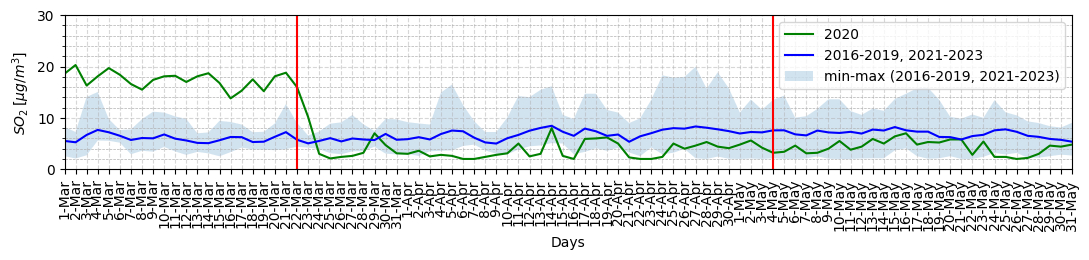

In [ ]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$SO_{2} \: [μg/m^{3}$]')

plt.plot(df['DAY'], df['SO2O'], 'g', label='2020')
plt.plot(df['DAY'], df['SO2MEAN'], 'b', label='2016-2019, 2021-2023')
plt.fill_between(df['DAY'], df['SO2MIN'], df['SO2MAX'], alpha=0.2, label='min-max (2016-2019, 2021-2023)')
plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,30)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(2))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

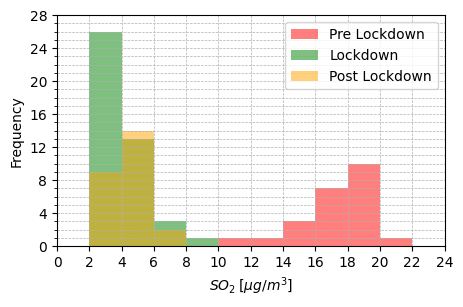

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))
bins = np.arange(0, 32, 2)

plt.hist(df['SO2O'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['SO2O'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['SO2O'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$SO_{2} \: [μg/m^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.xlim(0,24)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 26, 2))
plt.yticks(np.arange(0, 32, 4))
plt.grid(linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
mean_SO2MEAN = df['SO2MEAN'][23:66].dropna().mean()
mean_SO220 = df['SO2O'][23:66].dropna().mean()

if pd.notna(mean_SO2MEAN) and pd.notna(mean_SO220):
    percentage_change = ((mean_SO220 - mean_SO2MEAN) / mean_SO2MEAN) * 100
else:
    percentage_change = float('nan')

# Print the results
print(f"Mean of SO2MEAN (23-66): {mean_SO2MEAN}")
print(f"Mean of 2020 (23-66): {mean_SO220}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")


Mean of SO2MEAN (23-66): 6.807663584674418
Mean of 2020 (23-66): 3.683720930232558
Percentage Change: -45.89%


In [ ]:
PRE  = df['SO2O'][0:23].dropna().mean()
LOCK = df['SO2O'][23:66].dropna().mean()
POST = df['SO2O'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE }")
print(f"LOCK: {LOCK}")
print(f"POST: {POST}")

PRE: 17.073913043478264
LOCK: 3.683720930232558
POST: 4.36


In [ ]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: -78.42%
LOCK to POST: 18.36%


## **CO**

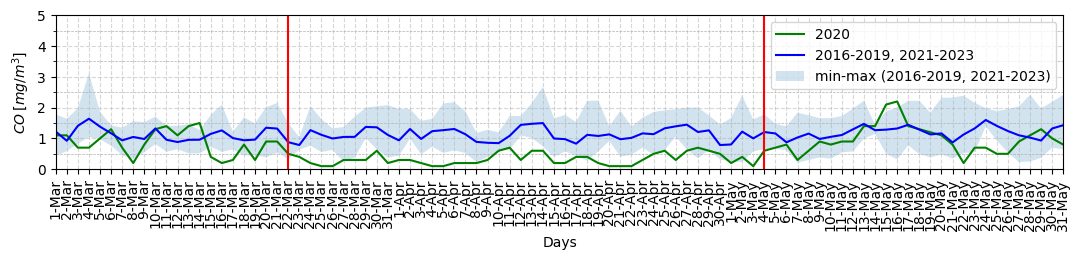

In [ ]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$CO \: [mg/m^{3}$]')

plt.plot(df['DAY'], df['CO2O'], 'g', label='2020')
plt.plot(df['DAY'], df['COMEAN'], 'b', label='2016-2019, 2021-2023')
plt.fill_between(df['DAY'], df['COMIN'], df['COMAX'], alpha=0.2 ,label='min-max (2016-2019, 2021-2023)')
plt.legend()


plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,5)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

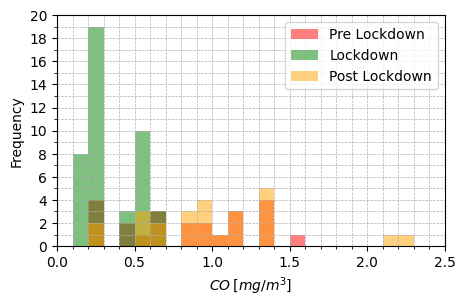

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))
bins = np.arange(0, 3.1, 0.1)

plt.hist(df['CO2O'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['CO2O'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['CO2O'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$CO \: [mg/m^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,2.5)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 3.0, 0.5))
plt.yticks(np.arange(0, 22, 2))
plt.grid(linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
mean_COMEAN = df['COMEAN'][23:66].dropna().mean()
mean_CO20 = df['CO2O'][23:66].dropna().mean()

if pd.notna(mean_COMEAN) and pd.notna(mean_CO20):
    percentage_change = ((mean_CO20 - mean_COMEAN) / mean_COMEAN) * 100

# Print the results
print(f"Mean (23-66): {mean_COMEAN }")
print(f"Mean of 2020 (23-66): {mean_CO20}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")


Mean (23-66): 1.1356482406744184
Mean of 2020 (23-66): 0.33953488372093016
Percentage Change: -70.10%


In [ ]:
PRE  = df['CO2O'][0:23].dropna().mean()
LOCK = df['CO2O'][23:66].dropna().mean()
POST = df['CO2O'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE }")
print(f"LOCK: {LOCK}")
print(f"POST: {POST}")

PRE: 0.826086956521739
LOCK: 0.33953488372093016
POST: 1.0


In [ ]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: -58.90%
LOCK to POST: 194.52%


## **NO**

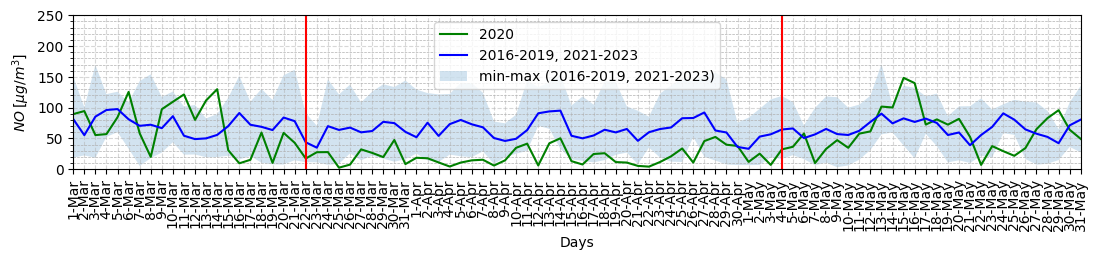

In [ ]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$NO \: [μg/m^{3}$]')

plt.plot(df['DAY'], df['NO2O'], 'g', label='2020')
plt.plot(df['DAY'], df['NOMEAN'], 'b', label='2016-2019, 2021-2023')
plt.fill_between(df['DAY'], df['NOMIN'], df['NOMAX'], alpha=0.2 ,label='min-max (2016-2019, 2021-2023)')

plt.legend()


plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,250)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

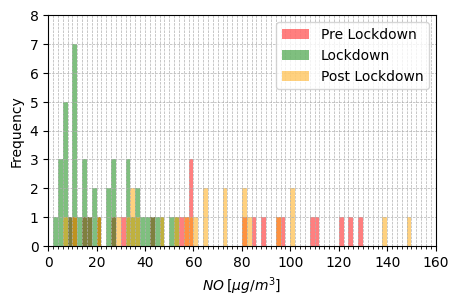

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))
bins = np.arange(0, 202, 2)

plt.hist(df['NO2O'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['NO2O'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['NO2O'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$NO \: [μg/m^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.xlim(0,160)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 180, 20))
plt.yticks(np.arange(0, 9, 1))
plt.grid(linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
mean_NOMEAN = df['NOMEAN'][23:66].dropna().mean()
mean_NO20 = df['NO2O'][23:66].dropna().mean()

if pd.notna(mean_NOMEAN) and pd.notna(mean_NO20):
    percentage_change = ((mean_NO20 - mean_NOMEAN) / mean_NOMEAN) * 100

# Print the results
print(f"Mean (23-66): {mean_NOMEAN }")
print(f"Mean of 2020 (23-66): {mean_NO20}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")

Mean (23-66): 64.61623729790698
Mean of 2020 (23-66): 21.59767441860465
Percentage Change: -66.58%


In [ ]:
PRE  = df['NO2O'][0:23].dropna().mean()
LOCK = df['NO2O'][23:66].dropna().mean()
POST = df['NO2O'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE }")
print(f"LOCK: {LOCK}")
print(f"POST: {POST}")

PRE: 65.51739130434783
LOCK: 21.59767441860465
POST: 63.604


In [ ]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: -67.04%
LOCK to POST: 194.49%


## **$NO_{2}$**

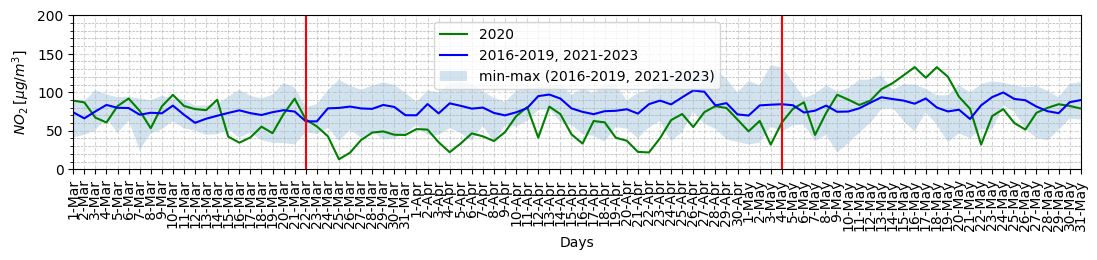

In [ ]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$NO_{2} \: [μg/m^{3}$]')


plt.plot(df['DAY'], df['NO22O'], 'g', label='2020')
plt.plot(df['DAY'], df['NO2MEAN'], 'b', label='2016-2019, 2021-2023')
plt.fill_between(df['DAY'], df['NO2MIN'], df['NO2MAX'], alpha=0.2, label='min-max (2016-2019, 2021-2023)')

plt.legend()


plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,200)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

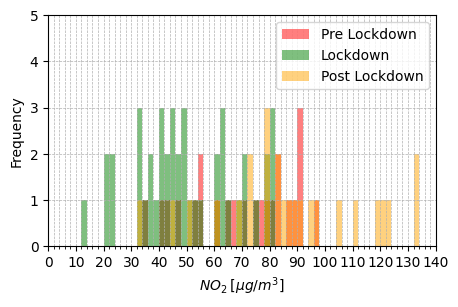

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(5,3))
bins = np.arange(0, 202, 2)

plt.hist(df['NO22O'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['NO22O'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['NO22O'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$NO_{2} \: [μg/m^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,140)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 150, 10))
plt.yticks(np.arange(0, 6, 1))
plt.grid(linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
mean_NO2MEAN = df['NO2MEAN'][23:66].dropna().mean()
mean_NO220 = df['NO22O'][23:66].dropna().mean()

if pd.notna(mean_NO2MEAN) and pd.notna(mean_NO220):
    percentage_change = ((mean_NO220 - mean_NO2MEAN) / mean_NO2MEAN) * 100

# Print the results
print(f"Mean (23-66): {mean_NO2MEAN }")
print(f"Mean of 2020 (23-66): {mean_NO220}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")

Mean (23-66): 35.01630089604651
Mean of 2020 (23-66): 50.01395348837209
Percentage Change: 42.83%


In [ ]:
PRE  = df['NO22O'][0:23].dropna().mean()
LOCK = df['NO22O'][23:66].dropna().mean()
POST = df['NO22O'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE }")
print(f"LOCK: {LOCK}")
print(f"POST: {POST}")

PRE: 70.24782608695651
LOCK: 50.01395348837209
POST: 87.54


In [ ]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: -28.80%
LOCK to POST: 75.03%


## **$O_{3}$**

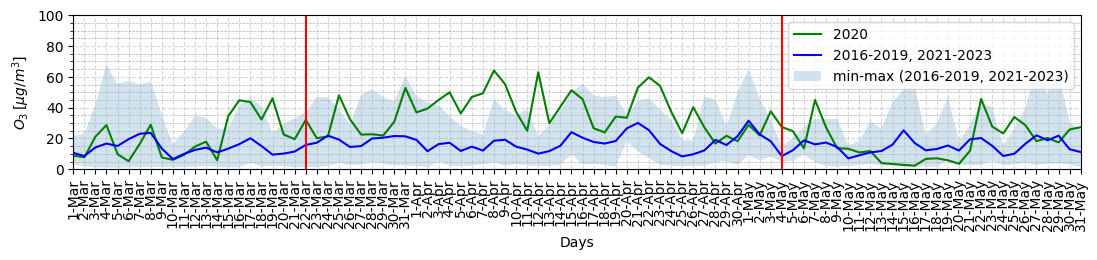

In [ ]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$O_{3} \: [μg/m^{3}$]')


plt.plot(df['DAY'], df['O32O'], 'g', label='2020')
plt.plot(df['DAY'], df['O3MEAN'], 'b', label='2016-2019, 2021-2023')
plt.fill_between(df['DAY'], df['O3MIN'], df['O3MAX'], alpha=0.2,label='min-max (2016-2019, 2021-2023)')

plt.legend()


plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,100)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(5))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

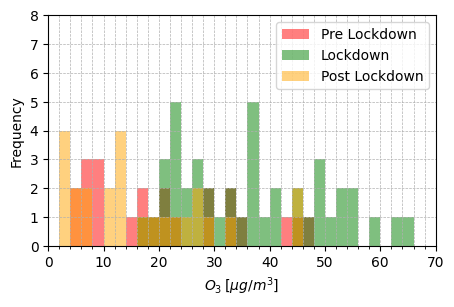

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))

bins = np.arange(0, 82, 2)

plt.hist(df['O32O'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['O32O'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['O32O'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$O_{3} \: [μg/m^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,70)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 80, 10))
plt.yticks(np.arange(0, 9, 1))
plt.grid(linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
mean_O3MEAN = df['O3MEAN'][23:66].dropna().mean()
mean_O320 = df['O32O'][23:66].dropna().mean()

if pd.notna(mean_O3MEAN) and pd.notna(mean_O320):
    percentage_change = ((mean_O320 - mean_O3MEAN) / mean_O3MEAN) * 100

# Print the results
print(f"Mean (23-66): {mean_O3MEAN}")
print(f"Mean of 2020 (23-66): {mean_O320}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")


Mean (23-66): 17.346768017255815
Mean of 2020 (23-66): 36.7093023255814
Percentage Change: 111.62%


In [ ]:
PRE  = df['O32O'][0:23].dropna().mean()
LOCK = df['O32O'][23:66].dropna().mean()
POST = df['O32O'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE }")
print(f"LOCK: {LOCK}")
print(f"POST: {POST}")


PRE: 21.021739130434785
LOCK: 36.7093023255814
POST: 16.94


In [ ]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: 74.63%
LOCK to POST: -53.85%


# $C_{6}H_{6}$

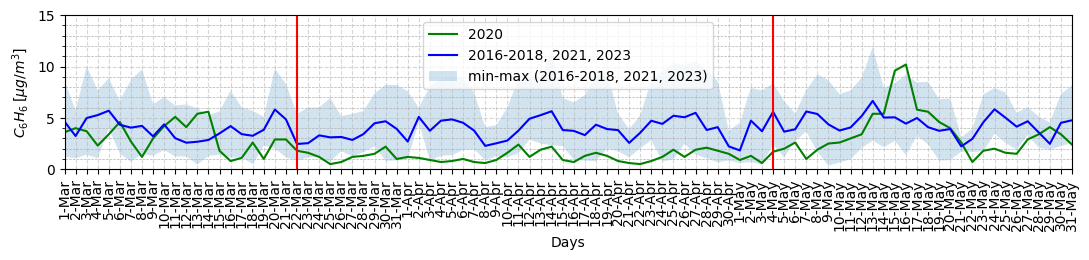

In [3]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$C_{6}H_{6}  \: [μg/m^{3}$]')

plt.plot(df['DAY'], df['BEN2O'], 'g', label='2020')
plt.plot(df['DAY'], df['BENMEAN'], 'b', label='2016-2018, 2021, 2023')
plt.fill_between(df['DAY'], df['BENMIN'], df['BENMAX'], alpha=0.2,label='min-max (2016-2018, 2021, 2023)')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,15)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

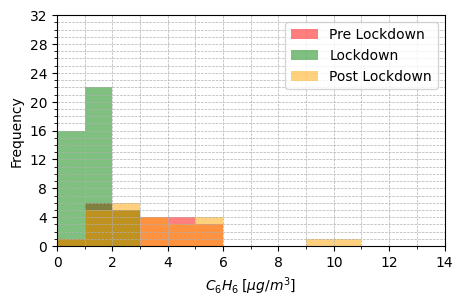

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))
bins = np.arange(0, 20,1)

plt.hist(df['BEN2O'][0:23][df['BEN2O'][0:23]>0], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['BEN2O'][23:66][df['BEN2O'][23:66]>0], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['BEN2O'][66:91][df['BEN2O'][66:91]>0], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$C_{6}H_{6} \: [μg/m^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,14)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 16, 2))
plt.yticks(np.arange(0, 36, 4))
plt.grid(linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
mean_BENMEAN = df['BENMEAN'][23:66].dropna().mean()
mean_BEN20 = df['BEN2O'][23:66].dropna().mean()

if pd.notna(mean_BENMEAN) and pd.notna(mean_BEN20):
    percentage_change = ((mean_BEN20 - mean_BENMEAN) / mean_BENMEAN) * 100

# Print the results
print(f"Mean (23-66): {mean_BENMEAN }")
print(f"Mean of 2020 (23-66): {mean_BEN20}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")


Mean (23-66): 3.932113562837209
Mean of 2020 (23-66): 1.241860465116279
Percentage Change: -68.42%


In [ ]:
PRE  = df['BEN2O'][0:23].dropna().mean()
LOCK = df['BEN2O'][23:66].dropna().mean()
POST = df['BEN2O'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE }")
print(f"LOCK: {LOCK}")
print(f"POST: {POST}")


PRE: 3.0173913043478255
LOCK: 1.241860465116279
POST: 3.6639999999999997


In [ ]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: -58.84%
LOCK to POST: 195.04%
